# **Análise Exploratória de Dados sobre Vendas de Video Games**

## Sobre o projeto

Durante o módulo de Técnicas de Programação, parte do curso de Data Science oferecido pela parceria entre Ada Tech e Santander Coders, fomos desafiados a fazer uma análise exploratória de dados para aplicar os conhecimentos das bibliotecas estudadas durante o mês de fevereiro 2024.

O tema foi deixado em aberto para que pudéssemos escolher o que mais nos interessasse.

## Tema do projeto

Com o objetivo de unir minhas duas paixões, jogos e programação, optei por explorar um conjunto de dados disponibilizado no Kaggle que contém informações sobre vendas de video games.

É importante ressaltar que o conjunto de dados abrange o período de 1980 a 2020, portanto, algumas análises podem não refletir a situação atual em 2024.

## Análises Realizadas
1. As 10 plataformas com maior quantidade de jogos lançados.
    
    1.1 O período de maior lançamento de jogos pelas principais plataformas.
2. As editoras que mais lançaram jogos.
3. A editora que liderou o mercado ao longo dos anos analisados (em relação às vendas).
    
    3.1. O jogo mais vendido das 5 principais editoras.

4. Análise das vendas por região.
5. Análise dos gêneros mais vendidos


## Importando as bibliotecas

Para este projeto usaremos:

`pandas`,
`numpy`,
`seaborn`,
`matplotlib`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import FuncFormatter

## Transformando o CSV em DataFrame

Assim poderemos manipular os dados utilizando as bibliotecas importadas

In [2]:
video_game_df = pd.read_csv('/content/Video_Games_Sales_as_at_22_Dec_2016.csv')

video_game_df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


## **Exploração Inicial**

Aqui faremos uma primeira exploração do dataset para entendermos algumas características dos dados e de como ele está disposto no DataFrame.

In [3]:
video_game_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16450.0,2006.487356,5.878995,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16719.0,0.263330,0.813514,0.00,0.00,0.08,0.24,41.36
EU_Sales,16719.0,0.145025,0.503283,0.00,0.00,0.02,0.11,28.96
JP_Sales,16719.0,0.077602,0.308818,0.00,0.00,0.00,0.04,10.22
Other_Sales,16719.0,0.047332,0.186710,0.00,0.00,0.01,0.03,10.57
Global_Sales,16719.0,0.533543,1.547935,0.01,0.06,0.17,0.47,82.53
Critic_Score,8137.0,68.967679,13.938165,13.00,60.00,71.00,79.00,98.00
Critic_Count,8137.0,26.360821,18.980495,3.00,12.00,21.00,36.00,113.00
User_Count,7590.0,162.229908,561.282326,4.00,10.00,24.00,81.00,10665.00


In [4]:
video_game_df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

## Descrição dos dados por coluna

**Name:** Nome do jogo

**Platform:** Plataforma de lançamento

**Year_of_Realease:** Ano de lançamento do jogo

**Genre:** Gênero do jogo

**Publisher:** Resposável pela publicação e comercialização do jogo

**NA_Sales:** Quantidade de cópias vendidas na América do Norte (em milhões)

**EU_Sales:** Quantidade de cópias vendidas na Europa (em milhões)

**JP_Sales:** Quantidade de cópias vendidas no Japão (em milhões)

**Other_Sales** Quantidade de cópias vendidas em outros países (em milhões)

**Global_Sales:** Quantidade total de cópias vendidas no mundo (em milhões)

**Critic_Score:** Pontuação da crítica (máximo 100)

**Critic_Count:** O número de críticos usados para chegar ao Critic_Score

**User_Score:** Pontuação dos usuários (máximo 10)

**User_Count:** O número de usuários usados para chegar ao User_Score

**Developer:** Parte responsável pela criação do jogo

**Rating:** Classificação por parte da *ESRB* (English Entertainment Software Rating Board)

In [5]:
video_game_df.shape

(16719, 16)

In [6]:
video_game_df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [7]:
max_ano = video_game_df['Year_of_Release'].max()
min_ano = video_game_df['Year_of_Release'].min()

min_ano, max_ano

(1980.0, 2020.0)

# **Análises**

## **Quantidade de jogos lançados por plataforma**

Podemos fazer uma análise quanto a quantidade de jogos que foram lançados de acordo com as plataformas em que eles poderiam ser jogados.


In [8]:
video_game_df["Platform"].value_counts()

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

### Com isso temos as 10 melhores plataformas sendo:

- Play Station 2 com 2161 jogos
- Nintendo DS com 2152 jogos
- Play Station 3 com 1331 jogos
- Nintendo Wii com 1320 jogos
- XBOX 360 com 1262 jogos
- Play Station Portátil (PSP) com 1209 jogos
- Play Station com 1197 jogos
- PC com 974 jogos
- XBOX com 824 jogos
- Game Boy Advance (GBA) com 822 jogos

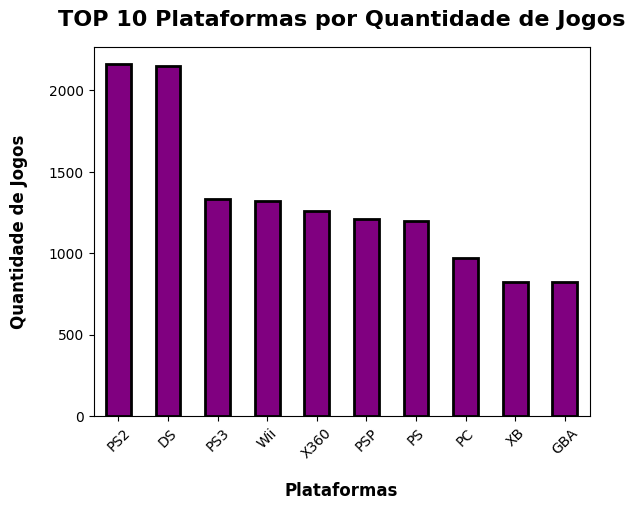

In [9]:
top_plataforma = video_game_df["Platform"].value_counts()[:10]
top_plataforma.plot(kind='bar', color='purple', edgecolor = 'black', linewidth = 2)

# Configurando o título
plt.title('TOP 10 Plataformas por Quantidade de Jogos', fontsize = 16, pad = 15, fontweight = 'bold')

# Configurando os eixos
plt.xlabel('Plataformas', fontsize = 12, labelpad = 15, fontweight = 'bold')
plt.xticks(rotation = 45)
plt.ylabel('Quantidade de Jogos', fontsize = 12, labelpad = 15, fontweight = 'bold')

plt.show()

Tendo como base as 10 plataformas com maiores quantidades de jogos lançados, podemos verificar a quantidade de jogos que foram lançados por ano, assim poderemos analisar qual foi o período de maior foco de lançamento de jogos. Antes precisamos tratar os dados para verificar e retirar os dados que não existem (nulos / NaN).

**Para isso, seguiremos os seguintes passos:**

1. Filtrar apenas para visualizarmos do DataFrame original '*video_game_df*' os dados referentes à essas 10 plataformas


In [10]:
top_plataforma_df = video_game_df[video_game_df['Platform'].isin(top_plataforma.index)]
top_plataforma_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


2. Verificar a quantidade de jogos, por plataforma, que não possuem dados do ano de lançamento.

Usaremos o método *.groupby* para agrupar os dados com base na coluna '*Platform*' e o *.size()* para que possamos contar quantos elementos existem em cada grupo.

In [11]:
(top_plataforma_df[top_plataforma_df['Year_of_Release'].isnull()]).groupby('Platform').size()

Platform
DS      30
GBA     11
PC      17
PS       7
PS2     34
PS3     25
PSP     16
Wii     34
X360    30
XB      21
dtype: int64

3. Qual é o maior e o menor ano de lançamento dessas plataformas

In [12]:
max_ano_analise = top_plataforma_df['Year_of_Release'].max()
min_ano_analise = top_plataforma_df['Year_of_Release'].min()

min_ano_analise, max_ano_analise

(1985.0, 2020.0)

4. Verificar a quantidade de jogos lançados por ano de acordo com cada plataforma
Obs.: Para os anos nulos ou NaN, preencheremos com 0

In [13]:
jogo_por_ano_por_plataforma = top_plataforma_df.groupby(['Platform','Year_of_Release']).size().unstack(fill_value=0)

O maior número de lançamentos por ano por plataforma foi de:

In [14]:
(jogo_por_ano_por_plataforma.max()).max()

492

5. Usaremos um mapa de calor para visualizar o resultado

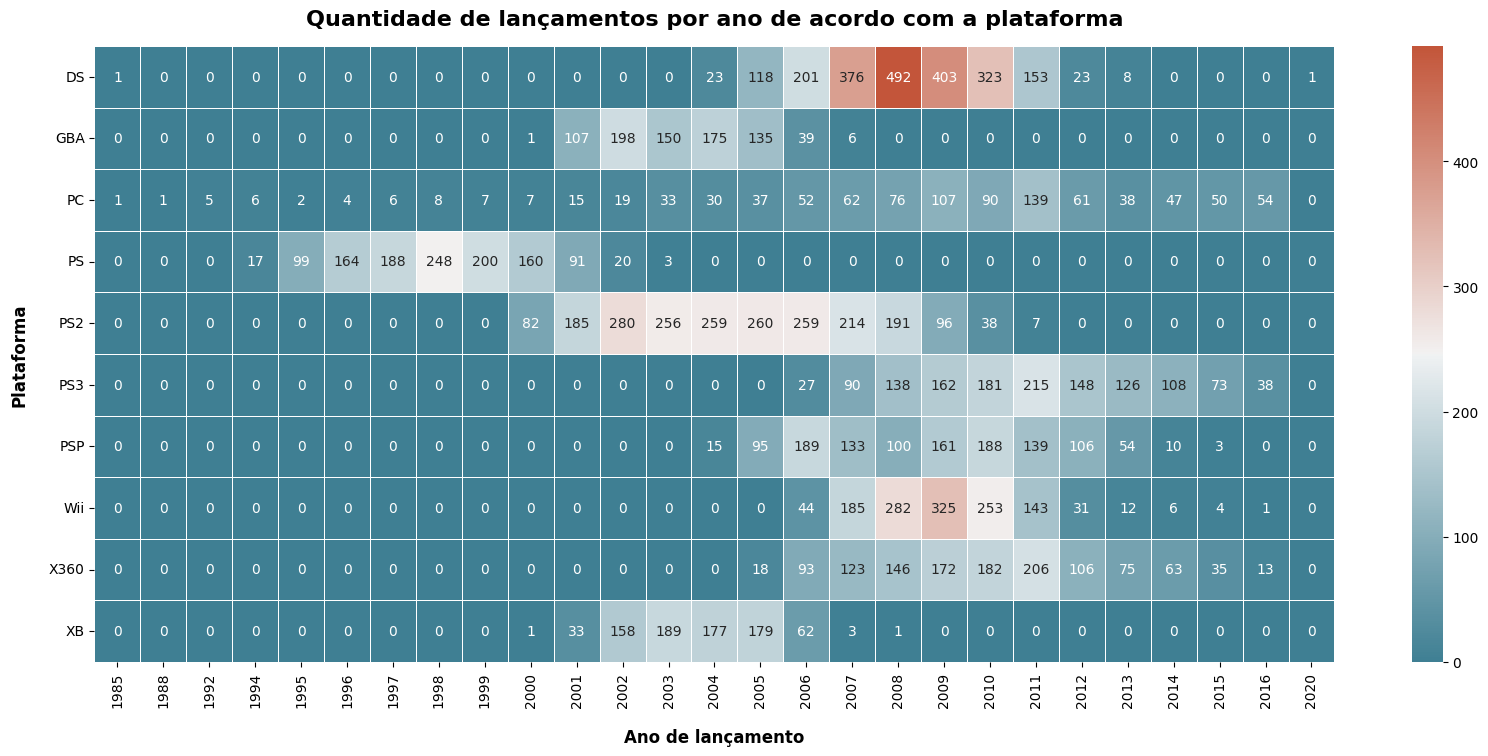

In [15]:
plt.figure(figsize=(20, 8))
grafico = sns.heatmap(jogo_por_ano_por_plataforma,
            annot = True,
            fmt = 'd',
            linewidth = 0.5,
            cmap = sns.diverging_palette(220, 20, as_cmap=True),
            )

# Configurando o gráfico
# Título
grafico.set_title('Quantidade de lançamentos por ano de acordo com a plataforma', fontsize = 16, pad = 15, fontweight = 'bold')

# Eixo x
grafico.set_xlabel('Ano de lançamento', fontsize  = 12, labelpad = 15, fontweight = 'bold')
grafico.set_xticklabels(([int(float(t.get_text())) for t in grafico.get_xticklabels()]))

# Eixo y
grafico.set_ylabel('Plataforma', fontsize  = 12, labelpad = 15, fontweight = 'bold')
grafico.set_yticklabels(grafico.get_yticklabels(), rotation = 0)

plt.show()

Analisando o mapa de calor apresentado, observa-se que a plataforma **Nintendo DS** destaca-se por ter o maior número de jogos lançados. Seu período de maior atividade foi **entre 2007 e 2010**, alcançando o **ápice em 2008, com um total de 492 lançamentos**. Em seguida, a **Nintendo Wii** registra uma alta atividade **entre 2008 e 2009**, sendo este o **ápice com 325 jogos** lançados.

## **Analisando as editoras** ('*Publisher*')

In [16]:
video_game_df['Publisher'].value_counts()

Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
                                ... 
Valve                              1
ITT Family Games                   1
Elite                              1
Evolution Games                    1
Red Flagship                       1
Name: Publisher, Length: 581, dtype: int64

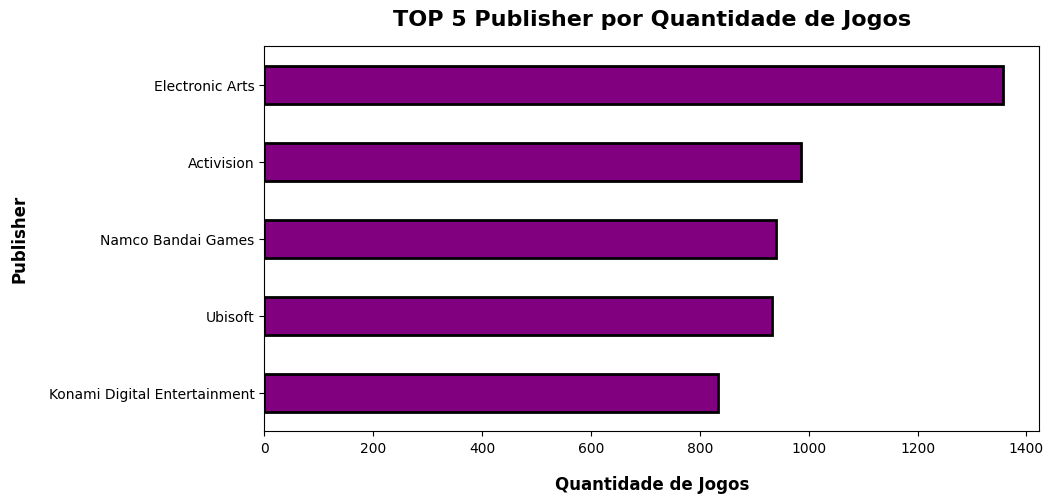

In [17]:
plt.figure(figsize=(10, 5))

top_publisher = (video_game_df['Publisher'].value_counts()[:5])[::-1]
top_publisher.plot(kind='barh', color='purple', edgecolor = 'black', linewidth = 2)

# Configurando o título
plt.title('TOP 5 Publisher por Quantidade de Jogos', fontsize = 16, pad = 15, fontweight = 'bold')

# Configurando os eixos
plt.xlabel('Quantidade de Jogos', fontsize = 12, labelpad = 15, fontweight = 'bold')
plt.ylabel('Publisher', fontsize = 12, labelpad = 15, fontweight = 'bold')

plt.show()

### Analisando as editoras por liderança de vendas

 Útil para analisarmos a posição das empresas frente ao mercado e interesse do público.

 Para isso criaremos um novo DataFrame `publisher_df` contendo o nome da editora, a quatidade total de jogos lançados por ela e o total de vendas globais.

 Com base nas vendas globais, poderemos calcular a participação de mercado de cada uma dessas empresas e analisar quais são as 5 principais.



In [18]:
# Criando o novo df
publisher_df = (video_game_df.groupby('Publisher').agg({
    'Name' : 'count',
    'Global_Sales' : 'sum',
}).reset_index())
publisher_df.columns = ['Publisher', 'Jogos_Total', 'Vendas_Globais']
publisher_df = publisher_df.sort_values(by='Vendas_Globais', ascending=False)

# Calculando a participação de mercado com base no total de vendas globais
vendas_total = publisher_df['Vendas_Globais'].sum()
publisher_df['Paticipacao_Mercado'] = (publisher_df ['Vendas_Globais'] / vendas_total * 100).round()

publisher_df[:5]

,Publisher,Jogos_Total,Vendas_Globais,Paticipacao_Mercado
361,Nintendo,706,1788.81,20.0
139,Electronic Arts,1356,1116.96,13.0
21,Activision,985,731.16,8.0
458,Sony Computer Entertainment,687,606.48,7.0
528,Ubisoft,933,471.61,5.0


Observando o novo DataFrame, podemos visualizar que a Nintendo liderou o mercado de vendas durante o período analisado com 20% das vendas globais, seguido da EA e da Activision.

Os jogos mais vendidos de cada uma dessas 5 Publisher pode ser visualizado a seguir:

In [19]:
nintendo_mais_vendido = (video_game_df[video_game_df['Publisher'] == 'Nintendo']).loc[
    (video_game_df[video_game_df['Publisher'] == 'Nintendo'])['Global_Sales'].idxmax()]

ea_mais_vendido = (video_game_df[video_game_df['Publisher'] == 'Electronic Arts']).loc[
    (video_game_df[video_game_df['Publisher'] == 'Electronic Arts'])['Global_Sales'].idxmax()]

activision_mais_vendido = (video_game_df[video_game_df['Publisher'] == 'Activision']).loc[
    (video_game_df[video_game_df['Publisher'] == 'Activision'])['Global_Sales'].idxmax()]

sony_mais_vendido = (video_game_df[video_game_df['Publisher'] == 'Sony Computer Entertainment']).loc[
    (video_game_df[video_game_df['Publisher'] == 'Sony Computer Entertainment'])['Global_Sales'].idxmax()]

ubisoft_mais_vendido = (video_game_df[video_game_df['Publisher'] == 'Ubisoft']).loc[
(video_game_df[video_game_df['Publisher'] == 'Ubisoft'])['Global_Sales'].idxmax()]

In [20]:
jogos_mais_vendidos_df = pd.DataFrame([nintendo_mais_vendido,
                                       ea_mais_vendido,
                                       activision_mais_vendido,
                                       sony_mais_vendido,
                                       ubisoft_mais_vendido])
jogos_mais_vendidos_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
77,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.12,6.12,0.06,1.28,8.57,82.0,42.0,4.3,896.0,EA Sports,E
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.04,4.24,0.13,1.32,14.73,88.0,81.0,3.4,8713.0,"Infinity Ward, Sledgehammer Games",M
28,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98,95.0,54.0,8.4,314.0,Polyphony Digital,E
61,Just Dance 3,Wii,2011.0,Misc,Ubisoft,5.95,3.11,0.00,1.06,10.12,74.0,15.0,7.8,16.0,Ubisoft,E10+


## **Análise das vendas por região**

Esta análise revela a dinâmica do mercado de videogames em diferentes regiões, destacando não apenas a liderança de vendas em determinados períodos mas também oferecendo uma visão global sobre as tendências de crescimento e retração ao longo de quatro décadas.

In [21]:
vendas_ano = video_game_df.groupby('Year_of_Release').agg({
    'NA_Sales' : 'sum',
    'EU_Sales' : 'sum',
    'JP_Sales' : 'sum',
    'Other_Sales' : 'sum',
    'Global_Sales' : 'sum'
}).reset_index()

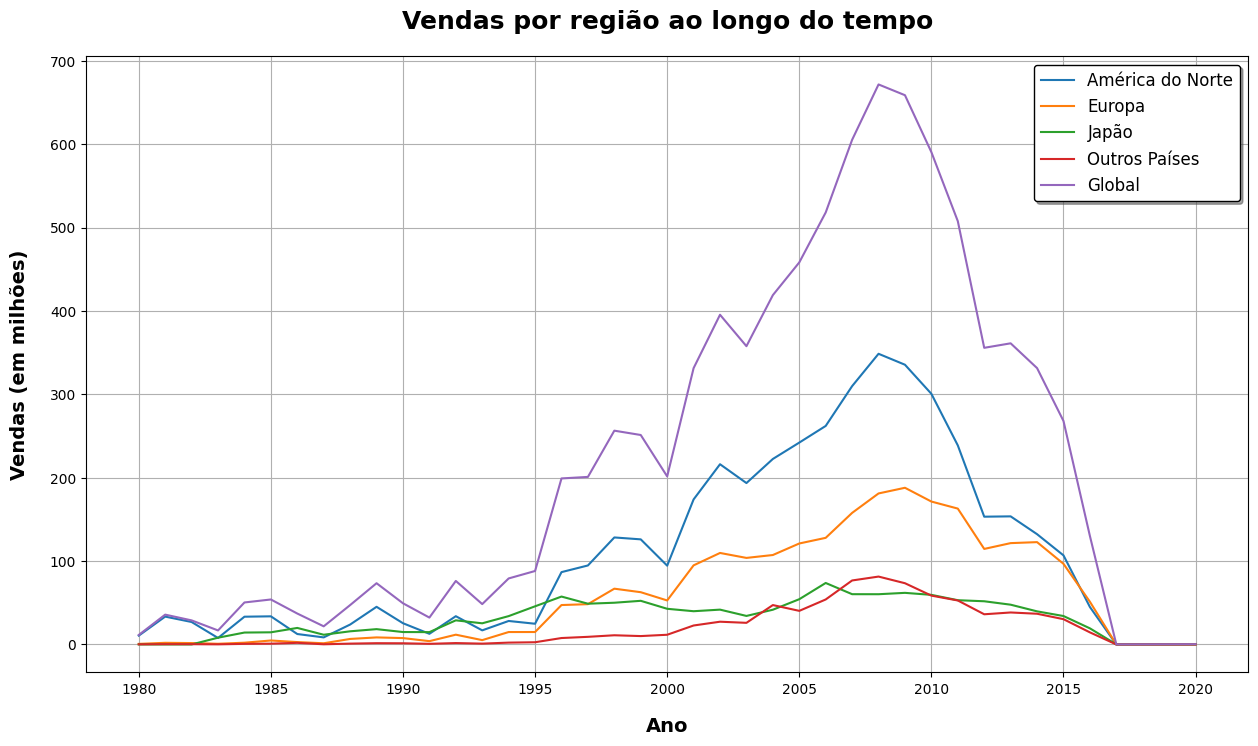

In [22]:
plt.figure(figsize = (15,8))
plt.plot(vendas_ano['Year_of_Release'], vendas_ano['NA_Sales'], label='América do Norte')
plt.plot(vendas_ano['Year_of_Release'], vendas_ano['EU_Sales'], label='Europa')
plt.plot(vendas_ano['Year_of_Release'], vendas_ano['JP_Sales'], label='Japão')
plt.plot(vendas_ano['Year_of_Release'], vendas_ano['Other_Sales'], label='Outros Países')
plt.plot(vendas_ano['Year_of_Release'], vendas_ano['Global_Sales'], label='Global')

# Configurando o título
plt.title('Vendas por região ao longo do tempo', fontsize = 18, pad = 20, fontweight = 'bold')

# Configurando os eixos
plt.xlabel('Ano', fontsize = 14, labelpad = 15, fontweight = 'bold')
plt.ylabel('Vendas (em milhões)', fontsize = 14, labelpad = 15, fontweight = 'bold')

plt.legend(fontsize = 'large', edgecolor = 'black', shadow = True)
plt.grid(True)
plt.show()

In [23]:
vendas_ano.loc[vendas_ano[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].idxmax()]

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
28,2008.0,348.69,181.14,60.25,81.42,671.79
29,2009.0,335.55,187.94,61.89,73.44,658.88
26,2006.0,262.13,127.89,73.74,53.95,518.22
28,2008.0,348.69,181.14,60.25,81.42,671.79
28,2008.0,348.69,181.14,60.25,81.42,671.79


Observa-se que o período de maior volume de vendas ocorreu entre os anos 2005 e 2010, com a América do Norte se destacando como o principal mercado em termos de vendas.

Adicionalmente, pode-se constatar um crescimento nas vendas globais a partir dos anos 2000, e um declínio iniciado em meados de 2012.

## **Análise de gêneros**

In [24]:
venda_genero = video_game_df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending = False)

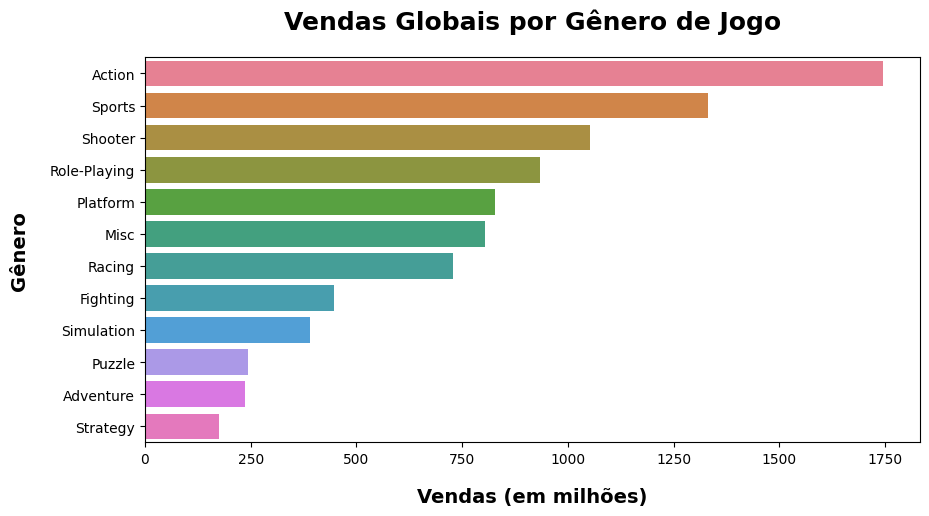

In [25]:
plt.figure(figsize=(10, 5))

sns.barplot(x=venda_genero.values, y=venda_genero.index, hue=venda_genero.index, palette='husl')

# Configurando o título
plt.title('Vendas Globais por Gênero de Jogo', fontsize = 18, pad = 20, fontweight = 'bold')

# Configurando os eixos
plt.xlabel('Vendas (em milhões)', fontsize = 14, labelpad = 15, fontweight = 'bold')
plt.ylabel('Gênero', fontsize = 14, labelpad = 15, fontweight = 'bold')

plt.show()

Observa-se que os três gêneros mais populares são os jogos de Ação, com 1745.27 milhões de vendas,  Esporte, com 1332 milhões de vendas e Tiro, com 1052.94 milhões de vendas.

# **Conclusão**

Em construção